In [ ]:
## IMPORTANT: On Colab, we expect your homework to be in the cs189 folder
## Please contact staff if you encounter any problems with installing dependencies
import sys, os
IS_COLAB = 'google.colab' in sys.modules
if IS_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/cs189/hw/hw1
    %pip install -r ./requirements.txt
    !pip install -U kaleido plotly
    import kaleido
    kaleido.get_chrome_sync()

import plotly.io as pio
pio.renderers.default = pio.renderers.default + "+png"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/cs189/hw/hw1
  Cloning https://github.com/BerkeleyML/otter-grader-189.git (to revision master) to /tmp/pip-install-90_d3kgn/otter-grader_62d19863f57e4a6ebd342aa0850ed77b
  Running command git clone --filter=blob:none --quiet https://github.com/BerkeleyML/otter-grader-189.git /tmp/pip-install-90_d3kgn/otter-grader_62d19863f57e4a6ebd342aa0850ed77b
  Resolved https://github.com/BerkeleyML/otter-grader-189.git to commit 35e43fdf64a55f4b9222d7b531890fb7d5cb498c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("fashion_pt_1.ipynb")

<link rel="stylesheet" href="berkeley.css">

<h1 class="cal cal-h1">Homework 1.1 – AGI, Everywhere, All at Once</h1>

Welcome to Homework 1.1! In this assignment, you will get familiar with common data and visualization tools like `numpy`, `pandas`, and `plotly`. This notebook emphasizes `pandas` operations throughout, and you will work with `DataFrames` as your primary data structure.

---

## Due Date: Friday, September 19, 11:59 PM

This assignment is due on **Friday, September 19, at 11:59 PM**. You must submit your work to Gradescope by this deadline. Please refer to the syllabus for the [Slip Day policy](https://eecs189.org/fa25/syllabus/#slip-days). No late submissions will be accepted beyond the details outlined in the Slip Day policy.

### Submission Tips:
- **Plan ahead**: We strongly encourage you to submit your work several hours before the deadline. This will give you ample time to address any submission issues.
- **Reach out for help early**: If you encounter difficulties, contact course staff well before the deadline. While we are happy to assist with submission issues, we cannot guarantee responses to last-minute requests.

---

## Assignment Overview

This notebook contains a series of tasks designed to help you practice and apply key concepts in data manipulation and visualization. You will complete all the TODOs in the notebook, which include both coding and written response questions. Some tasks are open-ended, which allows you to explore and experiment with different approaches.

### Key Learning Objectives:
1. Work with `numpy` and `pandas` for data manipulation.
2. Visualize data using `plotly` and `pandas`' built-in plotting functions.
3. Gain experience with organizing and analyzing datasets.
4. Understand the importance of data exploration and preprocessing.

---

<div align="center">

### Grading Breakdown

| Question | Manual Grading? | Points |
|----------|-----------------|--------|
| 0a       | No              | 1      |
| 1a       | No              | 1      |
| 1b       | No              | 1      |
| 1c       | Yes             | 1      |
| 1d       | No              | 1      |
| 2a       | No              | 2      |
| 2b       | No              | 1      |
| 2c       | Yes             | 1      |
| 2d       | Yes             | 2      |
| 3a       | No              | 2      |
| 3b       | No              | 2      |
| 3c       | No              | 1      |
| 3d       | Yes             | 2      |
| 3e       | No              | 2      |
| 3f       | No              | 1      |
| 3g       | No              | 1      |
| 3h       | Yes             | 1      |
| 3i       | No              | 1      |
| 3j       | Yes             | 1      |
| 4a       | No              | 1      |
| 4b       | No              | 2      |
| 4c       | No              | 2      |
| 4d       | No              | 2      |
| 4e       | No              | 2      |
| 4f       | No              | 1      |
| 4g       | Yes             | 2      |
| 4h       | No              | 1      |
| 4i       | No              | 2      |
| 4j       | Yes             | 2      |
| **Total**|                 | **42** |

</div>

**Note**: "Manual" questions are written response questions that will be graded manually by the course staff. All other questions will be graded automatically by the autograder.

---

### Instructions:
1. Carefully read each question and its requirements.
2. Complete all TODOs in the notebook. You may add extra lines of code if needed to implement your solution.
3. For manual questions, provide clear and concise written responses.
4. Test your code thoroughly to ensure it meets the requirements.

Good luck!

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import torchvision
import os
import random
from IPython.display import display

### **IMPORTANT:**
- Do not change the random seed values!!!
- Before you submit your notebook, remember to set `save_models=True` and `load_models=True`. This saves your final models which we will use for the autograder. Set these to false if you are still tweaking your model setup. We have provided code for saving models - **do not change these file names!!**
- When uploading your notebook, make sure to include your model file `classifier.joblib` in your submission

In [ ]:
# Set random seeds for reproducible results
SEED = 189
np.random.seed(SEED)
random.seed(SEED)

# IMPORTANT: set save_models to True to save trained models. YOU NEED TO DO THIS FOR THE AUTOGRADER TO WORK.
import joblib
save_models = True
load_saved_models = True # After training, you can set this to True to load the saved models and not have to re-train them.

<link rel="stylesheet" href="berkeley.css">

## Setup

### Load the Fashion-MNIST dataset  

In this homework, we will work with the Fashion-MNIST dataset, a widely used benchmark dataset for machine learning. It consists of grayscale 28x28 pixel images of various articles of clothing, making it an excellent dataset for practicing image classification.

>[Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms.](https://arxiv.org/abs/1708.07747) Han Xiao, Kashif Rasul, Roland Vollgraf.
> https://github.com/zalandoresearch/fashion-mnist

This dataset serves as an alternative to the classic MNIST digits dataset, which contains images of handwritten digits. Fashion-MNIST is more challenging and better reflects real-world image classification tasks.

We will load the dataset using [torchvision](https://docs.pytorch.org/vision/stable/index.html), a PyTorch library that provides popular datasets, models, and transformation tools. While you don't need to fully understand PyTorch for this homework, it's helpful to know that the dataset contains two key components:
* `data`: the images themselves, represented as 28x28 grayscale arrays.
* `targets`: the class labels for each image, where each label corresponds to a specific article of clothing.

The dataset includes 10 classes, each representing a type of clothing item:
- `T-shirt/top`
- `Trouser`
- `Pullover`
- `Dress`
- `Coat`
- `Sandal`
- `Shirt`
- `Sneaker`
- `Bag`
- `Ankle boot`

We will explore this dataset in detail and use it to practice data manipulation, visualization, and machine learning techniques.

In [ ]:
# Load the FashionMNIST dataset from torchvision
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)

# Extract the image data and convert it to a numpy array of type float
images = train_data.data.numpy().astype(float)

# Extract the target labels as a numpy array
targets = train_data.targets.numpy()

# Create a dictionary mapping class indices to class names
class_dict = {i: class_name for i, class_name in enumerate(train_data.classes)}

# Map the target labels to their corresponding class names
labels = np.array([class_dict[t] for t in targets])

# Create a list of class names in order of their indices
class_names = [class_dict[i] for i in range(len(class_dict))]

# Get the total number of samples in the dataset
n = len(images)

# Ensure class_names is a list of class names (redundant but ensures consistency)
class_names = list(class_dict.values())

# Print dataset information for verification
print("Loaded FashionMNIST dataset with {} samples.".format(n))
print("Classes: {}".format(class_dict))
print("Image shape: {}".format(images[0].shape))  # Shape of a single image
print("Image dtype: {}".format(images[0].dtype))  # Data type of the image array
print("Image type: {}".format(type(images[0])))   # Type of the image object

Loaded FashionMNIST dataset with 60000 samples.
Classes: {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
Image shape: (28, 28)
Image dtype: float64
Image type: <class 'numpy.ndarray'>


**Now let's create a `DataFrame` to organize our data**

In this class, we will be using a lot of [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html), which is a powerful library for data analysis and manipulation. A `DataFrame` in pandas is essentially a table where we can store and perform operations on our data.

### Why use a `DataFrame`?

A `DataFrame` allows us to:
- Organize data into rows and columns for better readability.
- Perform efficient operations on the data, such as filtering, grouping, and aggregating.
- Integrate seamlessly with other libraries for visualization and machine learning.

### Problem 0a

**Task:** Create a `DataFrame` called `df` with two columns: `image` and `label`. Each row should correspond to an image and its associated label. You can preview the first 5 rows of a `DataFrame` by calling `df.head()`.

**Hints:**
1. What is the current object type of the variable `images`? Note that `pandas` expects 1D or 2D data for each value in a `DataFrame` column. You may need to first convert `images` to a Python list before using it to create the `DataFrame`.
2. Later on, when we use our `DataFrame` for training, it's best if the values in the `image` column are [`ndarray`](https://numpy.org/doc/stable/reference/arrays.ndarray.html) objects. After creating the `DataFrame`, consider re-casting all the values in the `image` column to `ndarray` for consistency.

In [ ]:
# TODO: Create a DataFrame with two columns: `image` and `label`

df = pd.DataFrame({"image" : list(images), "label" : targets.astype("str")})

# Print the shape and columns of the DataFrame
print("DataFrame shape:", df.shape)
print("DataFrame columns:", df.columns.tolist())
df.head()

DataFrame shape: (60000, 2)
DataFrame columns: ['image', 'label']


,image,label
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",9
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.0...",3
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


In [ ]:
grader.check("q0")

q0 results: All test cases passed!

## Problem 1: Introduction to `pandas` and `Plotly`

Now that we have created our `DataFrame`, let's start analyzing our data. A key aspect of machine learning is understanding the data you are working with, so let's create some visualizations of our dataset.

One of the first steps in data analysis is to check how "balanced" the dataset is. This means examining the distribution of the labels to see if each class appears equally in the dataset. A balanced dataset ensures that no class is overrepresented or underrepresented, which can impact the performance of machine learning models.

### Problem 1a: Checking Dataset Balance

**Task**: Calculate the distribution of the `label` column in the `df` `DataFrame` using [`value_counts()`](https://pandas.pydata.org/pandas-docs/version/2.1.2/reference/api/pandas.Series.value_counts.html) and store it in a variable called `label_distribution`. Then, determine whether or not our dataset is balanced by comparing the minimum and maximum values of `label_distribution`. Store the result as a boolean value in the `is_balanced` variable.

In [ ]:
# TODO: Calculate the distribution of labels using `value_counts()``
# TODO: Compare the min and max values of `label_distribution` to determine if the dataset is balanced.

label_distribution = df.label.value_counts()
is_balanced = label_distribution.max() == label_distribution.min()

print(f"Label distribution:\n{label_distribution}")
print(f"Is the dataset balanced? {is_balanced}")

Label distribution:
label
9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64
Is the dataset balanced? True


In [ ]:
grader.check("q1a")

q1a results: All test cases passed!

### Problem 1b: Grouping Data with `groupby()`

The `groupby()` function in `pandas` is a powerful tool for grouping rows based on column values and applying aggregation functions like `.size()`.

**Task:**
Group `df` by the `label` column and count the rows in each group using `.size()`.

#### Example Output:

| label        | count |
|--------------|-------|
| Ankle boot   | 6000  |
| Bag          | 6000  |
| ...          | ...   |

[Learn more about `groupby()` here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)


In [ ]:
# TODO: Group the rows in `df` according to the values in the `labels` column. Then, count the number of rows in each group.
label_distribution_groupby = df.groupby("label").size()

In [ ]:
grader.check("q1b")

q1b results: All test cases passed!

### Problem 1c: Visualizing Label Distribution

One of the strengths of `pandas` is its ability to quickly generate visualizations of data. This is particularly useful for understanding the distribution of your dataset. In this task, we will use `pandas`' built-in plotting functions to create a visualization of the label distribution in our `DataFrame`.

#### Why Visualize Label Distribution?

Visualizing the label distribution helps us:
- Understand the balance of classes in the dataset.
- Identify any potential biases or imbalances that could affect model performance.
- Gain insights into the dataset before proceeding with further analysis.

**Task:**
1. Use the `pandas` [built-in plotting functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) to create a histogram of the label distribution. (x-axis is the class label and y axis is the sample count)
2. Ensure the chart is clear and labeled appropriately for easy interpretation.

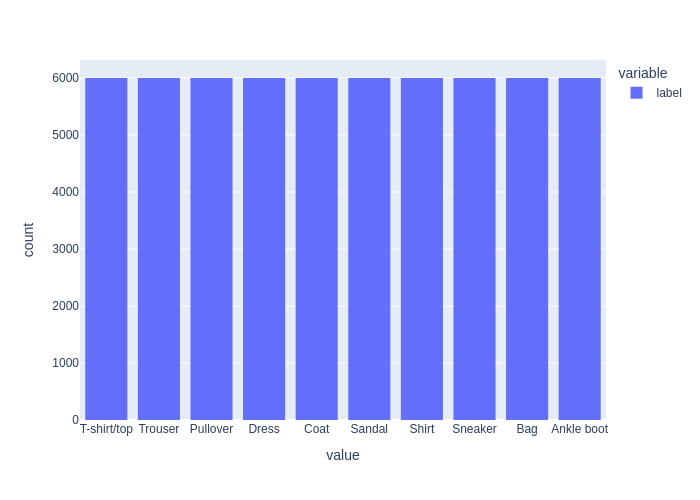

In [ ]:
# Plotting library to use, default is matplotlib but plotly has more functionality
pd.options.plotting.backend = "plotly"

# TODO: Plot a histogram of the labels in the DataFrame `df` using the DataFrame's built-in plotting functions (this should be 1 line)
df.label.sort_values().astype(int).map(class_dict).hist(bins=10)

As a quick refresher, here is the `show_images` function from lecture. This function visualizes our images and labels each of them with what class they are from.

In [ ]:
def show_images(images, max_images=40, ncols=5, labels = None, reshape=False):
    """Visualize a subset of images from the dataset.
    Args:
        images (np.ndarray or list): Array of images to visualize [img,row,col].
        max_images (int): Maximum number of images to display.
        ncols (int): Number of columns in the grid.
        labels (np.ndarray, optional): Labels for the images, used for facet titles.
    Returns:
        plotly.graph_objects.Figure: A Plotly figure object containing the images.
    """
    if isinstance(images, list):
        images = np.stack(images)
    n = min(images.shape[0], max_images) # Number of images to show
    px_height = 220 # Height of each image in pixels
    if reshape:
        images = images.reshape(images.shape[0], 28, 28)
    fig = px.imshow(images[:n, :, :], color_continuous_scale='gray_r',
                    facet_col = 0, facet_col_wrap=ncols,
                    height = px_height * int(np.ceil(n/ncols)))
    fig.update_layout(coloraxis_showscale=False)
    fig.update_xaxes(showticklabels=False, showgrid=False)
    fig.update_yaxes(showticklabels=False, showgrid=False)
    if labels is not None:
        # Extract the facet number and replace with the label.
        fig.for_each_annotation(lambda a: a.update(text=labels[int(a.text.split("=")[-1])]))
    return fig

### Problem 1d: Visualizing Class Examples

To better understand the dataset, let's visualize a few examples from each class. This will help us see what the images look like and how they differ across classes.

**Task**:
1. Use the `pandas` `groupby` function to group the `DataFrame` by the `label` column.
2. Sample 2 images per class.
3. Use the `show_images` function to display the images in a grid, with each image labeled by its class name.

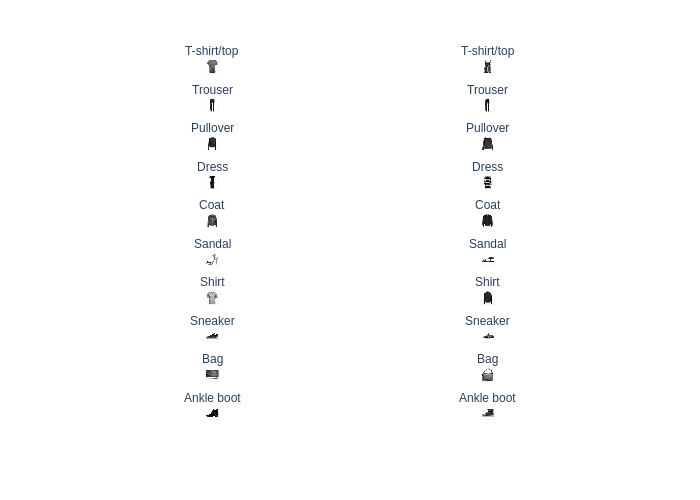

In [ ]:
# TODO: Get 2 sample images per class and plot them.
examples = df.groupby("label").sample(n = 2)
examples.label = examples["label"].astype(int).map(class_dict)

fig = show_images(examples["image"].tolist(), ncols=2, labels=examples.label.tolist(), reshape = True)
fig.show()

In [ ]:
grader.check("q1d")

q1d results: All test cases passed!

## Problem 2: Understanding Data Structure with Clustering

Before training classifiers, we explore the data structure using **k-means clustering**, an unsupervised learning method. This helps identify patterns and relationships in the dataset.

**Why Clustering?**

- **Discover Similarities**: Group similar clothing items based on pixel values.
- **Data Insights**: Understand dataset structure to guide modeling.
- **Simplify Data**: Potential preprocessing or dimensionality reduction.

**Steps:**
1. Flatten images for clustering (done below).
2. Apply k-means to group images.
3. Analyze clusters for patterns.

Before we can apply clustering algorithms or train models, we need to preprocess our images. Most machine learning algorithms expect input data to be in a 1-dimensional format. Currently, our images are in a 2D format with dimensions `(28, 28)`.

Thus, let's first reshape each image from `(28, 28)` to a 1-dimensional array of size `(784,)` using the Pandas the [`apply()`](https://pandas.pydata.org/pandas-docs/version/2.1.2/reference/api/pandas.DataFrame.apply.html) function

In [ ]:
df["image"] = df["image"].apply(lambda img: img.reshape(-1))
np.stack(df['image'].values).shape

(60000, 784)

### Problem 2a: K-means Clustering on the Pixels

Use K-means clustering to group similar images based on their pixel values. This will help us understand how well the algorithm can identify patterns in the dataset without using the labels.

**Task**:
1. Use the [sklearn's `KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class to cluster the images into `10` clusters (since there are 10 classes in the dataset). For efficiency we will only cluster a 1000 image sample (`df_sample`).
2. Create a `DataFrame` called `kmeans_df` with the following columns:
    - `image`: the image data (flattened to 1D arrays of size 784).
    - `label`: the true class label of the image.
    - `cluster`: the cluster label assigned by K-means.

**Instructions**:
- When clustering, set `random_state=SEED` for reproducibility.

**Expected Output**:
The `kmeans_df` DataFrame should look like this:

| cluster | label       | image                                   |
|---------|-------------|-----------------------------------------|
| 7       | Ankle boot  | [0.0, 0.0, 0.0, 0.0, 0.0, ...]         |
| 6       | T-shirt/top | [0.0, 0.0, 0.0, 0.0, 1.0, ...]         |

In [ ]:
# TODO: Perform k-means clustering on the images (10 clusters to match the number of classes)
from sklearn.cluster import KMeans

df_sample = df.sample(n=1000, random_state=SEED)
kmean = KMeans(n_clusters = 10, random_state=SEED)
kmean.fit(list(df_sample["image"].values))

y_pred = kmean.predict(list(df_sample.image.values)).astype("str")

kmeans_df = pd.DataFrame({"image" : df_sample.image,
                          "label" : df_sample.label.astype(int).map(class_dict),
                          "cluster" : y_pred})


kmeans_df.head(3)

,image,label,cluster
15248,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Bag,1
47407,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 54.0,...",T-shirt/top,1
44790,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Trouser,2


In [ ]:
grader.check("q2a")

q2a results: All test cases passed!

### Problem 2b: Evaluating K-means Clustering

K-means clustering groups data points into clusters based on their similarity. To evaluate how well the clustering algorithm has separated the classes, we can analyze the distribution of true labels within each cluster.

**Task:**
1. Use the `kmeans_df` `DataFrame` to calculate the distribution of true labels (`label`) within each cluster (`cluster`).
2. Create a [stacked bar plot](https://plotly.com/python/bar-charts/) to visualize the label counts per cluster. Each bar should represent a cluster, and the segments of the bar should represent the counts of each label within that cluster.

**Hint:** If you are running into issues where there are bars “hidden” behind other ones in your Plotly bar chart, try making sure you use fillna(0) or unstack(fill_value=0) after grouping by your KMean clusters.

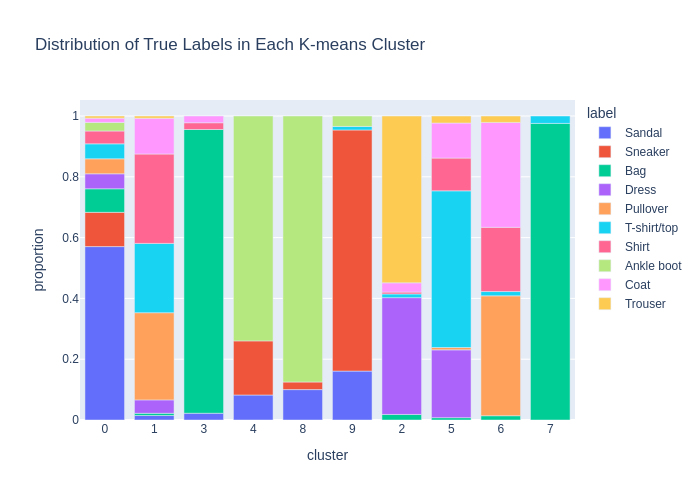

In [ ]:
# TODO: Create a stacked bar plot of the label counts per cluster.
cluster_label_counts = kmeans_df.groupby("cluster")["label"].value_counts(normalize = True).rename("proportion").reset_index().fillna(0)

cluster_label_counts.plot(
    kind='bar',
    title='Distribution of True Labels in Each K-means Cluster',
    x = "cluster",
    y = "proportion",
    color = "label"
)

### Problem 2c: Visualizing Clusters

To better understand the clusters formed by the K-means algorithm, we will visualize a few sample images from each cluster. This will help us identify patterns or similarities among images within the same cluster.

**Task:**
1. For each cluster, randomly sample 7 images.
2. Use the `show_images` function to display the sampled images in a grid.
3. Observe the visual similarities among images in the same cluster.

<!-- BEGIN QUESTION -->



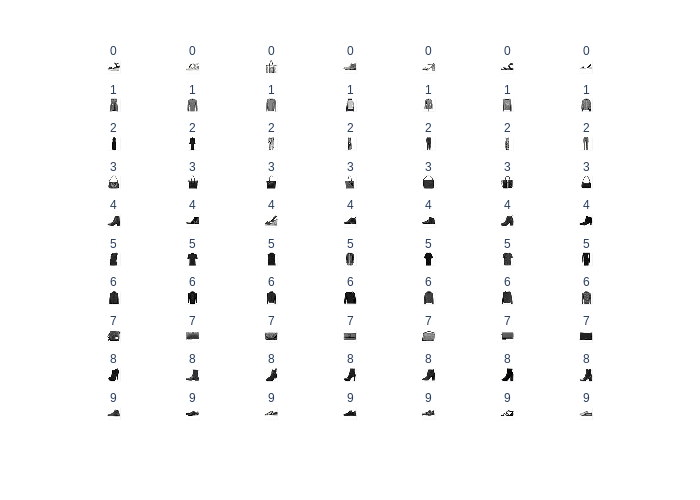

In [ ]:
# TODO: Plot 7 images from each cluster (use the show_images function, 10 rows, 7 columns)
data = kmeans_df.groupby("cluster").sample(n=7, random_state=SEED)
show_images(data["image"].tolist(), max_images = 70, ncols = 7, labels=data.cluster.tolist(), reshape = True)

<!-- END QUESTION -->

### Problem 2d: Observing Patterns in K-means Clustering

Reflecting on the visualizations from the previous part, we observe that the k-means clustering algorithm groups images not only by their clothing category (class) but also by other shared characteristics.

**Question:** Besides the clothing category, what other visual or structural characteristics of the images might the k-means clustering algorithm be grouping together?

> For my opinion, I think it is possible to categorize clothes and shoes with whether it has string or not, because shoes and bags have and clothes are not. In addition to that, I think it is possible to use the feature of high heel.

<!-- END QUESTION -->

## Problem 3: Training a Classifier

In this section, we will train a machine learning classifier to predict clothing categories from image pixel data. Specifically, we will use a Multi-Layer Perceptron (MLP) classifier, which is a type of neural network.

### Workflow Overview

We will follow a structured workflow:
1. **Data Preparation**: Split the dataset into training and testing sets while maintaining class balance.
2. **Model Training**: Train the MLP classifier on the training set.
3. **Model Evaluation**: Evaluate the classifier's performance on the test set using metrics like accuracy.
4. **Visualization**: Visualize predictions and analyze misclassifications to understand model behavior.

This workflow mirrors the process used in the lecture notebook, but you will implement some of the functions yourself to deepen your understanding.

**Creating Train/Test Split** As mentioned in lecture, first we will split our dataset into training and testing sets. This is a crucial step in machine learning to evaluate how well a model generalizes to unseen data.

Unlike the lecture, where we used sklearn's [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function, we have split our dataset using pandas functions.

**Do not change this function!** Otherwise the autograder will likely fail.

In [ ]:
df_copy = df.copy()
train_df = df_copy.groupby('label').sample(frac=0.8, random_state=SEED)
test_df = df_copy[~df_copy.index.isin(train_df.index)]
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 48000
Test set size: 12000


### Problem 3a: Train MLP Classifier

In this task, we will train a Multi-Layer Perceptron (MLP) classifier to predict clothing categories from image data. The MLP is a type of neural network that is well-suited for classification tasks. The demo notebook from lecture 3 could be particularly useful.  

**Steps to Follow:**

1. **Data Normalization**:
    - Scale the pixel values of the images to the range `[0, 1]` for better training performance.
    - Create new variables `X_train_sc` and `X_test_sc` for the scaled training and testing data, respectively. Do not overwrite the original `X_train` and `X_test`.

2. **Model Training**:
    - Use the same MLP configuration (size, hyperparameters) as demonstrated in the lecture 3 notebook.
    - Train the model on the normalized training data.

3. **Loss Curve**:
    - Extract the loss curve from the trained model using the `model.loss_curve_` attribute.
    - Create a `DataFrame` called `loss_df` with two columns: `epoch` and `loss`.
    - Use Plotly Express to plot the loss curve, showing how the loss decreases as the number of epochs increases.


**Notes:**
- The term "loss" refers to the error (textbook terminology) during training. Minimizing the loss is the goal of the training process.
- Ensure that the model is trained with reproducibility in mind (e.g., set a random seed to `SEED` where applicable).

In [ ]:
# Importing necessary modules for training and preprocessing
from sklearn.neural_network import MLPClassifier  # Multi-Layer Perceptron Classifier for training
from sklearn.preprocessing import StandardScaler  # StandardScaler for normalizing the data

X_train shape: (48000, 784)	 y_train shape: (48000,)
X_test shape: (12000, 784)	 y_test shape: (12000,)


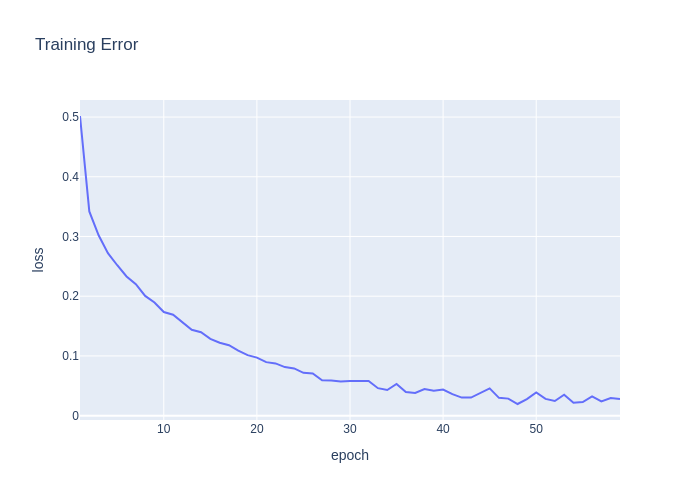

In [ ]:
# flatten features into 1D arrays
X_train = np.stack(train_df['image'].values)
y_train = train_df['label'].values
X_test = np.stack(test_df['image'].values)
y_test = test_df['label'].values

print(f"X_train shape: {X_train.shape}\t y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}\t y_test shape: {y_test.shape}")

# TODO: Train the model using the scaled traning data and plott the loss curve (remeber to normalize your data!)
# NOTE: Your model must be named `model`

X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

if load_saved_models and os.path.exists('classifier.joblib'):
    model = joblib.load('classifier.joblib')
    y_pred = model.predict(X_test_sc)
else:
    model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=100, tol=1e-3, random_state=SEED).fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
if save_models:
    joblib.dump(model, 'classifier.joblib')

loss_df = pd.DataFrame({"epoch" : range(1, 60), "loss" : model.loss_curve_})
loss_df.plot(x='epoch', y='loss', title="Training Error")

In [ ]:
grader.check("q3a")

q3a results: All test cases passed!

### Problem 3b: Adding Predictions and Evaluation Metrics to DataFrames

**Task:** Modify both `train_df` and `test_df` by adding the following columns and compute train and test accuracy:

1. **`predicted_label`**: The predicted label for each image, as determined by the trained model.
2. **`correct`**: A boolean value indicating whether the predicted label matches the true label (`True` for correct predictions, `False` otherwise).
3. **`probs`**: The class probabilities for each image, represented as a list of size 10 (one probability per class).
4. **`confidence`**: The probability associated with the predicted label, representing the model's confidence in its prediction.

In [ ]:
# TODO: Add the columns listed above to `train_df` and `test_df`.
train_df = train_df.copy()
test_df = test_df.copy()

train_df.label = train_df.label
train_df["predicted_label"] = model.predict(X_train_sc)
train_df["correct"] = train_df.predicted_label == train_df.label
train_df["probs"] = model.predict_proba(X_train_sc).tolist()
train_df["confidence"] = train_df.probs.apply(lambda x: max(x))

test_df.label = test_df.label
test_df["predicted_label"] = model.predict(X_test_sc)
test_df["correct"] = test_df.predicted_label == test_df.label
test_df["probs"] = model.predict_proba(X_test_sc).tolist()
test_df["confidence"] = test_df.probs.apply(lambda x: max(x))

print("--- Column Types ----")
for col in train_df.columns:
    val = train_df[col].iloc[0]
    print(f"{col}: {type(val)}")
print("-----------")

train_accuracy = len(train_df[train_df.correct == True]) / len(train_df)
test_accuracy = len(test_df[test_df.correct == True]) / len(test_df)

print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

--- Column Types ----
image: <class 'numpy.ndarray'>
label: <class 'str'>
predicted_label: <class 'str'>
correct: <class 'numpy.bool'>
probs: <class 'list'>
confidence: <class 'numpy.float64'>
-----------
Training accuracy: 0.994
Test accuracy: 0.884


In [ ]:
grader.check("q3b")

q3b results: All test cases passed!

### Problem 3c: Class Accuracy Analysis and Visualization

Analyze the model's performance for each class and visualize the class-wise accuracy for both the training and testing datasets.

#### **Task 1**: Create a `class_accuracy` DataFrame
1. Group the `train_df` and `test_df` DataFrames by `label` (class).
2. Calculate the accuracy for each class as the proportion of correct predictions (`correct` column).
3. Add a `split` column to indicate whether the data is from the training or testing set.
4. Combine the results into a single DataFrame called `class_accuracy` with the following columns:
    - `split`: Indicates whether the data is from the training or testing set.
    - `label`: The class label.
    - `correct`: The accuracy for the class.


#### **Task 2**: Visualize Class Accuracy
1. Use the `class_accuracy` DataFrame to create a grouped bar chart.
2. The x-axis should represent the class labels (`label`), and the y-axis should represent the accuracy (`correct`).
3. Use different colors for the training and testing splits:
    - Training: Blue
    - Testing: Red
4. Add the actual accuracy values on top of the bars, rounded to two decimal places. To do this you can add `text_auto=True` to your `.plot` call. If you want to round these numbers to the nearest 2nd decimal, set `text_auto='.2f'`


**Hints**:
- Use `reset_index()` after grouping to convert the grouped data into a DataFrame.

For example, after a groupby:

    df.groupby(['A', 'B'])['C'].mean()

you get a Series with a multi-index:

```bash
    A      B       
    foo    x      0.92
           y      0.85
    bar    x      0.99
           y      0.97
    Name: C, dtype: float64
```

If you call `.reset_index()`, you get a `DataFrame` with columns:

```bash
       A    B     C
    0  foo  x  0.92
    1  foo  y  0.85
    2  bar  x  0.99
    3  bar  y  0.97
```

This makes it much easier to plot or further manipulate the data.

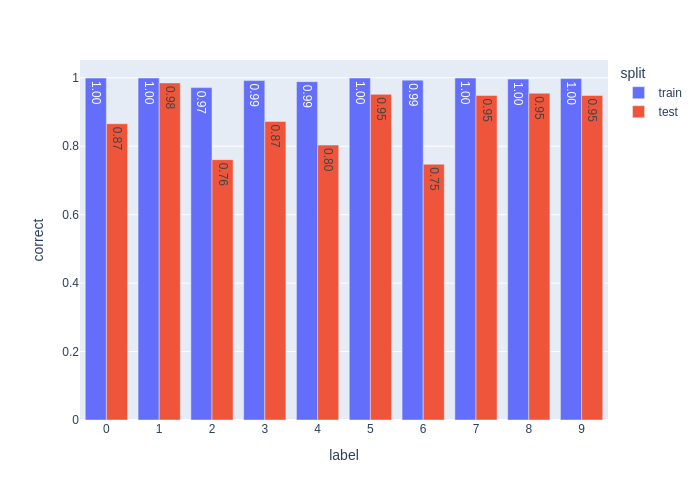

In [ ]:
# TODO: Calculate train and test accuracy per class
# TODO: Use class_accuracy to create a grouped bar chart of class accuracy for train and test
train_acc = train_df.groupby("label").correct.mean().reset_index()
train_acc["split"] = ["train" for _ in range(len(train_acc))]
test_acc = test_df.groupby("label").correct.mean().reset_index()
test_acc["split"] = ["test" for _ in range(len(test_acc))]

class_accuracy = pd.concat([train_acc, test_acc])

#print(class_accuracy)

class_accuracy.plot(
    x = "label",
    y = "correct",
    color = "split",
    kind = "bar",
    barmode = "group",
    text_auto='.2f'

)

In [ ]:
grader.check("q3c")

q3c results: All test cases passed!

### Problem 3d: Best and Worst Performing Classes

**Question:**  
- Identify the best and worst performing classes for train and test splits. If tied, list all classes with the same performance.  
- Do the best/worst performing classes match between splits?  
- Do train and test accuracies differ? Why?


1. Identify the best and worst performing classes for train and test splits. If tied, list all classes with the same performance.
> The best performing class for train is 1, 5, and 7 (0.999375), which are tie. For the test set, class 1 (0.985) has a best performance. The worst performing class for train set is 4 (0.97125) and the worst performing class for test set is 6 (0.7475).

2. Do the best/worst performing classes match between splits?
> No, they do not match.

3. Do train and test accuracies differ? Why?
> Although the accuracy on the test set is also very high, the accuracy on the training set is still higher across all classes. One reason may be that some features (though very few) appear in the test set but not in the training set. Another possible reason is overfitting of the model.




<!-- END QUESTION -->

### Problem 3e: Create Confusion Matrix

An often easier way to understand model performance is with a confuction matrix, which show how often predictions match the true labels and where errors occur.

---

#### Refresher:
1. **Precision**: Measures the accuracy of positive predictions for a class.
  $$
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$

2. **Recall**: Measures the ability to identify all positive samples for a class.
  $$
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$

---

**Tasks**:
1. **Hand-implement a confusion matrix**:
  - Use numpy operations to compute a 10x10 matrix where rows represent true labels and columns represent predicted labels.
  
2. **Visualize the confusion matrix**:
  - Use a [heatmap](https://plotly.com/python/heatmaps/) to display the matrix for better interpretability. Y axis should be the true label and the X axis should be the predicted label.

3. **Using your confusion matrix, evaluate performance**:
  - Compute overall test accuracy.
  - Calculate precision and recall for each class using the confusion matrix.

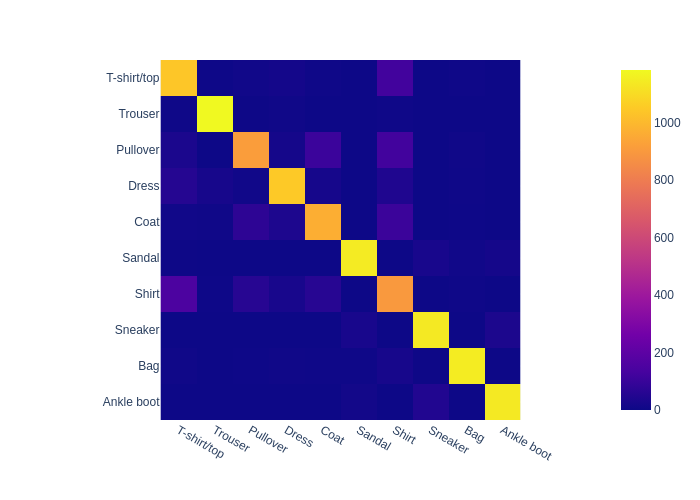

In [ ]:
# Initialize confusion matrix with zeros
conf_matrix = np.zeros((len(class_names), len(class_names)), dtype=int)
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

# Fill the confusion matrix by counting predictions and plot it as a heatmap
conf_matrix = np.bincount(test_df.label.to_numpy(np.int64) * len(class_names) + test_df.predicted_label.to_numpy(np.int64),
                          minlength=len(class_names)*len(class_names)).reshape(len(class_names), len(class_names))

fig = px.imshow(conf_matrix,
                x = class_names,
                y = class_names,
                text_auto=False)

fig.show()

In [ ]:
# Calculate accuracy from confusion matrix
accuracy_from_matrix = (np.trace(conf_matrix) / conf_matrix.sum() )
print(f"\nAccuracy calculated from confusion matrix: {accuracy_from_matrix:.3f}")

# Calculate per-class metrics from confusion matrix
per_class_metrics = []
print("\nPer-class metrics from confusion matrix:")
for i, class_name in enumerate(class_names):
    true_positives = conf_matrix[i, i]
    false_positives = conf_matrix[:, i].sum() - true_positives
    false_negatives = conf_matrix[i, :].sum() - true_positives
    per_class_metrics.append({
        'class': class_name,
        'precision': true_positives / (true_positives + false_positives),
        'recall': true_positives / (true_positives + false_negatives)
    })

pd.DataFrame(per_class_metrics)


Accuracy calculated from confusion matrix: 0.884

Per-class metrics from confusion matrix:


,class,precision,recall
0,T-shirt/top,0.799846,0.865833
1,Trouser,0.968852,0.985000
2,Pullover,0.854069,0.760833
3,Dress,0.901809,0.872500
4,Coat,0.829604,0.803333
5,Sandal,0.962901,0.951667
6,Shirt,0.679545,0.747500
7,Sneaker,0.937397,0.948333
8,Bag,0.972835,0.955000
9,Ankle boot,0.955500,0.948333


In [ ]:
grader.check("q3e")

q3e results: All test cases passed!

### Problem 3f: Analyze Prediction Confidence

In this section, we will analyze the model's prediction confidence to better understand its behavior. Specifically, we will identify examples where the model is uncertain or overly confident, and evaluate how these cases relate to the correctness of its predictions.

#### Objectives:
1. **Find the Image with the Lowest Confidence**:
    - Identify the image for which the model has the least confidence in its prediction.

2. **Analyze Low Confidence but Correct Predictions**:
    - Find examples where the model made the correct prediction but with low confidence.

3. **Analyze High Confidence but Incorrect Predictions**:
    - Identify examples where the model is highly confident but makes incorrect predictions.

**Task:** Let’s start by finding **the image with the lowest confidence**.

Image with lowest confidence:
      label predicted_label  confidence  correct
56032     2               2    0.381093     True
39858     4               4    0.406652     True
50496     4               0    0.418121    False


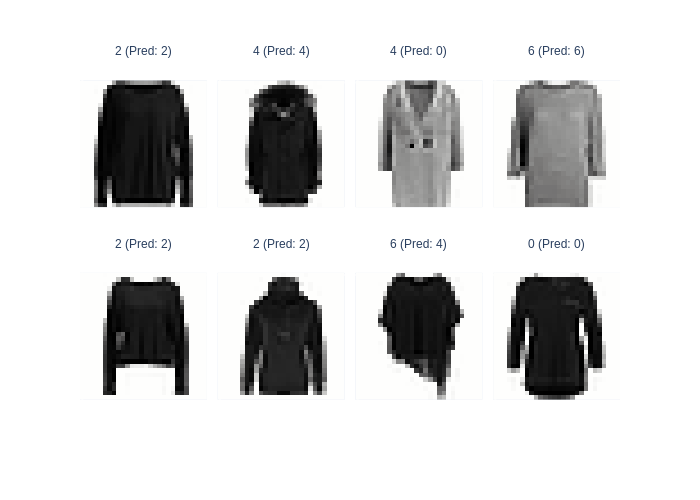

In [ ]:
# TODO: Find the image with the lowest confidence by sorting the `confidence` column of `test_df`
least_confident = test_df.sort_values("confidence")
print("Image with lowest confidence:")
print(least_confident[['label', 'predicted_label', 'confidence', 'correct']][:3])

# Show image with lowest confidence and its predicted label
show_labels = [f"{label} (Pred: {predicted_label})" for label, predicted_label in zip(least_confident["label"].tolist(), least_confident["predicted_label"].tolist())]
fig = show_images(np.stack(least_confident["image"].tolist()), 8, ncols=4, labels=show_labels, reshape=True)
fig.show()

In [ ]:
grader.check("q3f")

q3f results: All test cases passed!

### Problem 3g: Investigating Class Confusion for "Ankle boot"

**Task:**
Visualize Low-Confidence Correct Predictions: Display 10 test images where the true label is "Ankle boot," the prediction is correct, but confidence is lowest.

/tmp/ipython-input-753774014.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-753774014.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



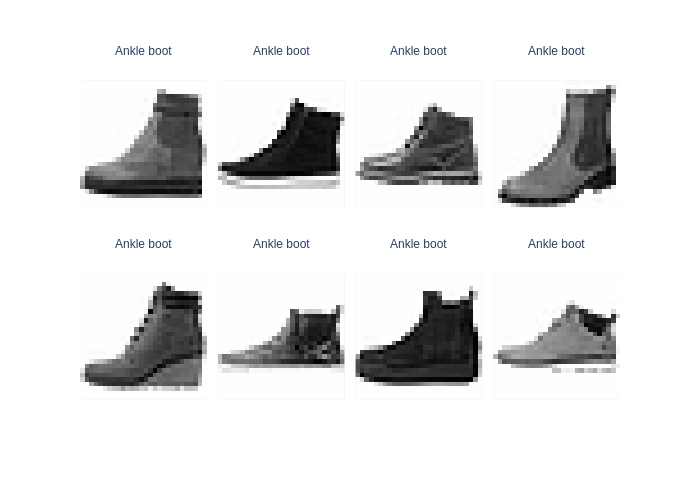

In [ ]:
# TODO: Visualize 10 images from the `test_set` whose true label is `Ankle boot` that the model correctly classified but with low confidence
test_df_boot = test_df[(test_df.label == '9') & (test_df.predicted_label == '9')]
test_df_boot.label = test_df_boot.label.astype(int).map(class_dict)
test_df_boot.predicted_label = test_df_boot.predicted_label.astype(int).map(class_dict)

# Find low confidence correct predictions (uncertain but right)
low_conf_correct = test_df_boot.sort_values("confidence", ascending = True).head(10)

# Visualize low confidence correct predictions
show_images(low_conf_correct["image"].tolist(), 8, ncols=4, labels=low_conf_correct["predicted_label"].tolist(), reshape=True)

In [ ]:
grader.check("q3g")

q3g results: All test cases passed!

### Problem 3h: Reasons for Low Confidence in the "Ankle boot" Class

**Task:** Analyze visual patterns in low-confidence images for the "Ankle boot" class. What is a potential reasons for the model to be so unconfident in these classifications?

> A potential reason for the model's low confidence in classifying 'Ankle boot' images is that their features are visually similar to other types of shoes. For example, some ankle boots have high heels, which resemble high heels, and others have laces, which are also common in sneakers.

<!-- END QUESTION -->

### Problem 3i: Investigating Class Confusion for "Trouser"

Now let's look at cases where the model is confidently incorrect.

**Task:** For the `Trouser` class, visualize the 10 images from the test set which are incorrectly classified as `Dress` but have the highest confience and answer the question below.

/tmp/ipython-input-2266289156.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2266289156.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



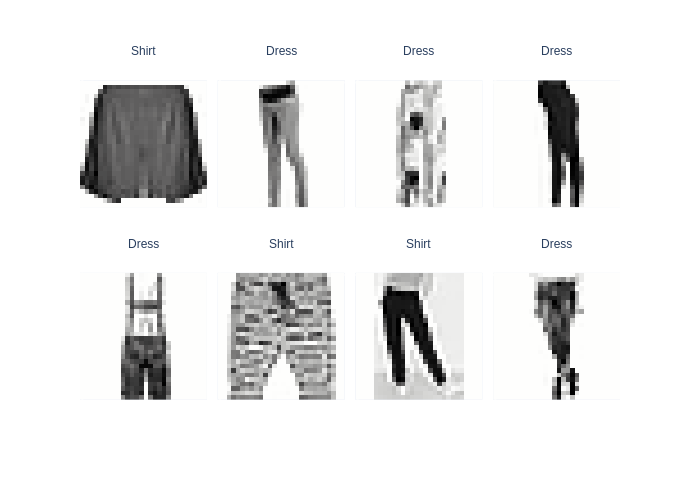

In [ ]:
# TODO: Visualize 10 images from the `test_set` whose true label is `Trouser` that the model incorrectly classified as `Dress` with high confidence
test_df_trouser = test_df[(test_df.label == '1') & (test_df.predicted_label != '1')]
test_df_trouser.label = test_df_trouser.label.astype(int).map(class_dict)
test_df_trouser.predicted_label = test_df_trouser.predicted_label.astype(int).map(class_dict)

# Find high confidence incorrect predictions (confident but() wrong)
high_conf_incorrect = test_df_trouser.sort_values("confidence", ascending = False).head(10)

# Visualize high confidence incorrect predictions
show_images(high_conf_incorrect["image"].tolist(), 8, ncols=4, labels=high_conf_incorrect["predicted_label"].tolist(), reshape=True)

In [ ]:
grader.check("q3i")

q3i results: All test cases passed!

### Problem 3j: Reasons for High Confidence in the "Trouser" Class

**Task:** What are some potential reasons for the model to be so confident in its classifications of some of these examples?

> A potential reason for the model's high-confidence misclassifications is that some trousers share similar visual features with other clothing items. For example, they have a long vertical shape like dresses, and certain patterns may resemble shirts. Additionally, the 28 X 28 resolution makes it difficult to distinguish whether an item is a trouser, dress, or shirt.

<!-- END QUESTION -->

Now that we have become more familiar with the modeling process, let’s look at how we can augment our data and how these augmentations affect our classifier.

## Problem 4: Image Augmentation via Transformation Matrices

In this problem, you will explore how to implement image augmentations such as rotation, flipping, and scaling—using **matrix multiplication**. The goal is to construct a transformation matrix $T$ such that, when multiplied by a flattened image vector, it produces the augmented image:

$$\text{augmented\_image} = T \cdot \text{original\_image} = \text{original\_image} \cdot T^T$$

Each transformation matrix $T$ will be of size $N \times N$, where $N$ is the total number of pixels in the image (e.g., for a 28×28 image, $N=784$). Each row of $T$ defines how to compute the value of a single output pixel as a weighted sum of the input pixels.

---

### Why Use a Transformation Matrix?

Using a matrix for image transformations has several advantages:
1. **Efficiency**: Matrix multiplication is computationally efficient and can be optimized for hardware acceleration.
2. **Composability**: Multiple transformations (e.g., rotation followed by scaling) can be combined into a single matrix by multiplying their respective transformation matrices.
3. **Flexibility**: Any linear transformation, including interpolation, can be represented as a matrix.

---

### Example: Horizontal Flip Matrix

Let’s consider a simple example of flipping a 3×3 image horizontally. The flattened image is ordered row-wise:

Original indices:
$$\begin{bmatrix}
0 & 1 & 2 \\
3 & 4 & 5 \\
6 & 7 & 8
\end{bmatrix}$$

After a horizontal flip, the columns are reversed:
$$\begin{bmatrix}
2 & 1 & 0 \\
5 & 4 & 3 \\
8 & 7 & 6
\end{bmatrix}$$

The transformation matrix $T$ for this operation is a **permutation matrix** that swaps the columns for each row. For a 3×3 image, $T$ is a 9×9 matrix where each row has a single 1 in the position corresponding to the flipped pixel, and 0 elsewhere.

---

In this question, you will:

1. **Understand Transformation Matrices**:
    - Learn how to construct transformation matrices for common operations like shifting, blurring, and rotating.

2. **Implement Augmentations**:
    - Write code to generate transformation matrices for the following operations:
      - **Shifting**: Move the image left, right, up, or down.
      - **Blurring**: Apply a smoothing effect by averaging neighboring pixels.
      - **Rotating**: Rotate the image by a specified angle.

3. **Combine Transformations**:
    - Experiment with combining multiple transformations into a single matrix and observe the results.

Each method will consist of two steps:

1. **Create the Transformation Matrix**:  
    Construct a 784x784 transformation matrix that represents the desired image augmentation (e.g., rotation, flipping, scaling). Each row of the matrix determines how the value of a single output pixel is computed as a weighted sum of the input pixels.

2. **Apply the Transformation**:  
    Use the `apply_transformation` function (provided below) to apply the transformation matrix to your image. This function will handle the matrix multiplication and reshape the output back into the original image dimensions.

**Example: Vertical Flip**
To help you get started, we have implemented a simple vertical flip as an example. This transformation matrix swaps the rows of the image, flipping it vertically.

In [ ]:
def apply_transformation(image, T):
    # Input: A (N, 784) image vector and a (784, 784) transformation matrix
    # Output: A (N, 784) image vector
    transformed_flat = image @ T.T
    return transformed_flat.reshape(image.shape)

In [ ]:
def create_vertical_flip_matrix(height=28, width=28):
    """
    Returns a (height*width, height*width) matrix that vertically flips an image
    when applied to its flattened vector. Values are 0 or 1.
    """
    N = height * width  # Total number of pixels in the image
    T = np.zeros((N, N), dtype=int)  # Initialize the transformation matrix with zeros
    for i in range(height):  # Loop over each row
        for j in range(width):  # Loop over each column
            orig_idx = i * width + j  # Compute the flattened index for the original pixel
            flipped_i = height - 1 - i  # Compute the row index after vertical flip
            flipped_idx = flipped_i * width + j  # Compute the flattened index for the flipped pixel
            # Set the corresponding entry in the transformation matrix to 1
            # This means the pixel at (i, j) moves to (flipped_i, j)
            T[flipped_idx, orig_idx] = 1
    return T

def vertical_flip(image):
    T_flip = create_vertical_flip_matrix()
    return apply_transformation(image, T_flip)

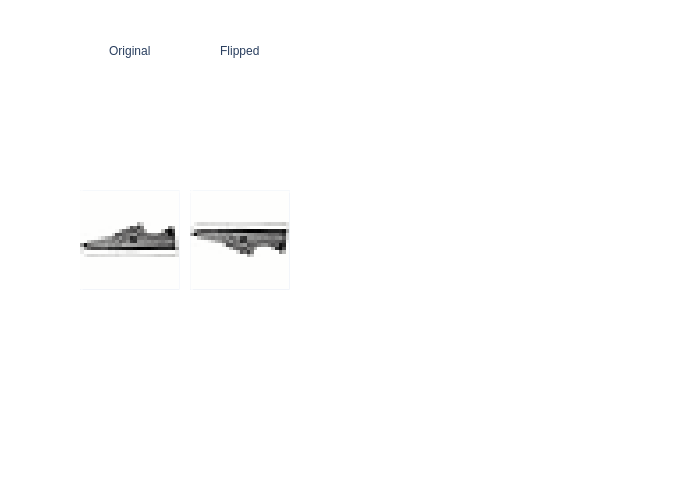

In [ ]:
test_image = np.load("test_image.npy")

flipped_image = vertical_flip(test_image)
show_images(np.stack([test_image, flipped_image]), labels=['Original', 'Flipped'], reshape=True)

### Problem 4a: Horizontal Flip

Now, let's implement a horizontal flip transformation using a matrix. A horizontal flip mirrors the image along its vertical axis. For example, the leftmost column becomes the rightmost column.

**Steps**:
1. **Understand the Transformation Matrix**:
    - The matrix `T` is `N x N` (where `N = height * width`).
    - Each row of `T` has a single `1` to indicate the new position of a pixel after the flip.

2. **Construct the Matrix**:
    - For each pixel `(i, j)`, compute its new position `(i, width - 1 - j)`.

3. **Apply the Transformation**:
    - Use the `apply_transformation` function to apply `T` to the flattened image.

**Hints**:
- Adjust the `flipped_j` and `flipped_idx` variables for the horizontal flip.
- Ensure the function returns a **flattened** image after applying the transformation.
- Fill any empty spaces in the transformed image with `0`


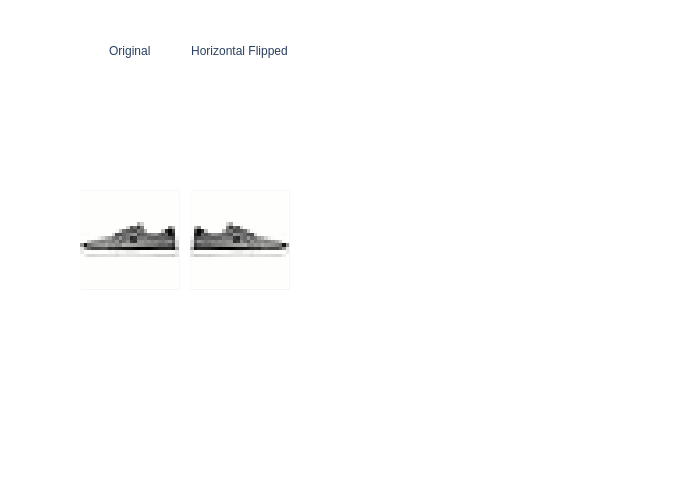

In [ ]:
def create_horizontal_flip_matrix(height=28, width=28):
    """
    Returns a (height*width, height*width) matrix that horizontally flips an image
    when applied to its flattened vector. Values are 0 or 1.
    """
    N = height * width
    T = np.zeros((N, N), dtype=int)
    for i in range(height):
        for j in range(width):
            orig_idx = i * width + j
            flipped_j = width - 1 - j
            flipped_idx = i * width + flipped_j
            T[flipped_idx, orig_idx] = 1
    return T

def horizontal_flip(image):
    T_flip = create_horizontal_flip_matrix()
    return apply_transformation(image, T_flip)

flipped_image = horizontal_flip(test_image)

show_images(np.stack([test_image, flipped_image]), labels=['Original', 'Horizontal Flipped'], reshape=True)

In [ ]:
grader.check("q4a")

q4a results: All test cases passed!

### Problem 4b: Image Shifting

**Task**: Implement a function to shift images by a specified number of pixels in any direction.

**Steps**:  
- Create a function that shifts an image by `dx` pixels horizontally and `dy` pixels vertically.  
- Fill empty spaces with 0s.  
- Handle cases where the shift moves parts of the image outside the boundaries.  
- Return the shifted image as a flattened array.

**Hint**:  
Think of copying pixels from a source region in the original image to a destination region in the final image. For example:  
- If `dx` is positive (shift right), the source x-range starts at 0 and ends at `28 - dx`.  
- If `dx` is negative (shift left), the source x-range starts at `-dx` and ends at 28.   
- If `dy` is positive (shift down), the source y-range starts at 0 and ends at `28 - dy`.  
- If `dy` is negative (shift up), the source y-range starts at `-dy` and ends at 28.  

Ensure the function returns a **flattened** image.

Fill any empty spaces in the transformed image with `0`

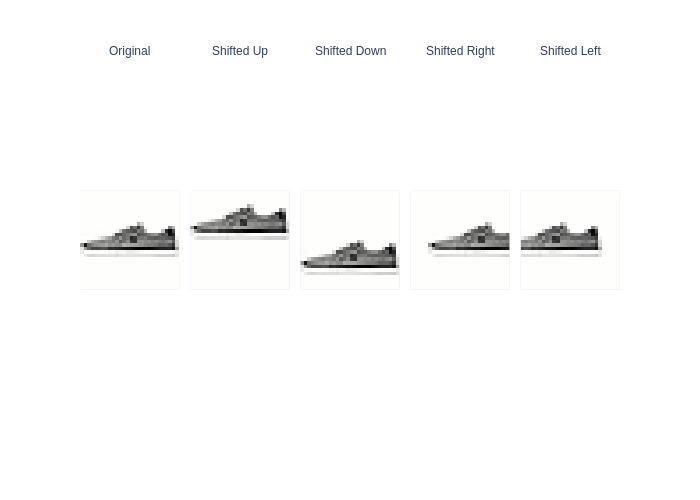

In [ ]:
def create_shift_matrix(dx, dy, height=28, width=28):
    """
    Create a transformation matrix for shifting an image by dx pixels horizontally and dy pixels vertically.

    Args:
        dx (int): Number of pixels to shift horizontally.
        dy (int): Number of pixels to shift vertically.
        height (int): Height of the image.
        width (int): Width of the image.

    Returns:
        np.ndarray: A (height*width, height*width) transformation matrix for shifting.
    """
    N = height * width
    T = np.zeros((N, N))
    for i in range(height):
        for j in range(width):
            orig_idx = i * width + j

            # 새로운 위치 계산
            new_i = i + dy
            new_j = j + dx

            # 경계 체크
            if 0 <= new_i < height and 0 <= new_j < width:
                new_idx = new_i * width + new_j
                T[new_idx, orig_idx] = 1  # 픽셀 이동 표시

    return T


def shift_image(image, dx, dy):
    """
    Shift an image by dx pixels horizontally and dy pixels vertically.

    Args:
        image (np.ndarray): Flattened image array of shape (height*width,).
        dx (int): Number of pixels to shift horizontally.
        dy (int): Number of pixels to shift vertically.

    Returns:
        np.ndarray: Shifted image as a flattened array.
    """
    T = create_shift_matrix(dx, dy)
    return apply_transformation(image, T)

shifted_right_image = shift_image(test_image, 5, 0)
shifted_left_image = shift_image(test_image, -5, 0)
shifted_up_image = shift_image(test_image, 0, -5)
shifted_down_image = shift_image(test_image, 0, 5)

all_images = np.stack([test_image, shifted_up_image, shifted_down_image, shifted_right_image, shifted_left_image])
plot_labels = ['Original', 'Shifted Up', 'Shifted Down', 'Shifted Right', 'Shifted Left']
show_images(all_images, labels=plot_labels, reshape=True)

In [ ]:
grader.check("q4b")

q4b results: All test cases passed!

### Problem 4c: Image Blurring

**Task**  
Implement a blurring function using a transformation matrix that averages the values of neighboring pixels.

---

**What is blurring?**  
Blurring reduces the sharpness of an image by averaging each pixel with its neighbors, creating a smoother appearance.  
This is done with a **sliding square kernel** (window) that moves across the image.  
For each pixel, the kernel specifies which surrounding pixels contribute to the average.

---

**Key Concepts**
- **Kernel Size**  
  Controls how many neighbors are included in the average.
  - A **3×3 kernel** averages a pixel with its 8 immediate neighbors.
  - A **5×5 kernel** averages a pixel with its 24 neighbors.
- **Blurring Process**
  1. For each pixel, place a square kernel centered on that pixel.
  2. Collect all pixels that fall inside the kernel and inside the image.
  3. Compute the average of these valid pixels and assign it to the center pixel.

> *Edge handling:*  
> If the kernel extends beyond the image border, only the pixels that actually overlap the image are averaged.

---

**Example with a 4×4 image using a 3×3 kernel**

Original 4×4 image:

\begin{bmatrix}
10 & 20 & 30 & 40 \\
15 & 25 & 35 & 45 \\
50 & 60 & 70 & 80 \\
55 & 65 & 75 & 85
\end{bmatrix}


Consider the pixel with value 25 in row 2 col 2 [index (1, 1) in the matrix].  
Its 3×3 window contains:

\begin{bmatrix}
10 & 20 & 30 \\
15 & \textbf{25} & 35 \\
50 & 60 & 70
\end{bmatrix}

The blurred value for this position is the average of the numbers in this window (35).

For a corner pixel like (0, 0), the 3×3 window lies partly outside the image, so we average only the valid four neighbors:
\[
\frac{10 + 20 + 15 + 25}{4} = 17.5.
\]

Applying this process to every pixel produces a softened 4×4 image.

---

**Steps:**
1. Implement a function that, for each pixel, averages over a centered square window (kernel) of odd size (e.g., 3, 5, 7).  
   Handle edges by averaging only the valid neighbors.
2. Use a transformation matrix to apply this operation to the entire image.
3. Ensure the function works for any odd kernel size (e.g., 3x3, 5x5).
4. Return the blurred image as a flattened array.


Fill any empty spaces in the transformed image with `0`

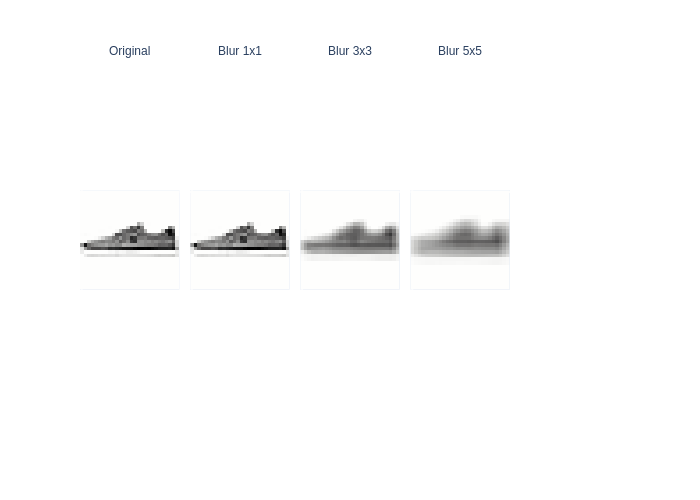

In [ ]:
def create_blur_matrix(kernel_size=3, height=28, width=28):
    """
    Create a transformation matrix T that applies a uniform mean blur using a centered, odd-sized square sliding window.

    For each output pixel (i, j):
      1) Place a `kernel_size × kernel_size` window centered at (i, j).
      2) If the window is outside the image, then it will have fewer neighbors (only average the pixels that exist)

    Args:
        kernel_size (int): Size of the square kernel (must be odd).
        height (int): Height of the image.
        width (int): Width of the image.

    Returns:
        np.ndarray: A (height*width, height*width) transformation matrix for blurring.
    """
    N = height * width
    T = np.zeros((N, N))
    pad = kernel_size // 2
    kernel_area = kernel_size * kernel_size

    # Each pixel contributes equally to a kernel's neighborhood
    for i in range(height):
        for j in range(width):
            output_idx = i * width + j

            start_i = max(0, i - pad)
            end_i = min(height, i + pad + 1)
            start_j = max(0, j - pad)
            end_j = min(width, j + pad + 1)

            for ki in range(start_i, end_i):
                for kj in range(start_j, end_j):
                    input_idx = ki * width + kj
                    T[output_idx, input_idx] = 1.0 / kernel_area

    return T

def blur_image(image, kernel_size=3):
    """
    Apply a blur transformation to a flattened image array or a batch of flattened images.

    Args:
        image (np.ndarray): Flattened image array of shape (height*width,) or batch of images (N, height*width).
        kernel_size (int): Size of the square kernel to use for blurring.

    Returns:
        np.ndarray: Blurred image(s) as a flattened array or batch of arrays.
    """
    T = create_blur_matrix(kernel_size)
    return apply_transformation(image, T)

blurred_1x1 = blur_image(test_image, kernel_size=1)
blurred_3x3 = blur_image(test_image, kernel_size=3)
blurred_5x5 = blur_image(test_image, kernel_size=5)

blurred_images = [test_image, blurred_1x1, blurred_3x3, blurred_5x5]
blurred_labels = ['Original', 'Blur 1x1', 'Blur 3x3', 'Blur 5x5']

show_images(blurred_images, labels=blurred_labels, reshape=True)

In [ ]:
grader.check("q4c")

q4c results: All test cases passed!

### Problem 4d: Image Rotation

**Task**: Implement a function to rotate an image by a given angle `theta` (in degrees).

**Steps**:
1. **Create the Rotation Matrix**:
    - Write a function `create_rotation_matrix(theta)` that generates a transformation matrix to rotate a flattened image by `theta` degrees.
    - Convert `theta` from degrees to radians using `np.deg2rad(theta)` before applying trigonometric functions.
    - Ensure the center of rotation is the center of the image.

2. **Apply the Transformation**:
    - The output should be a transformation matrix of shape `(height*width, height*width)`.
    - When this matrix is multiplied by the flattened image, it should produce the rotated image (also flattened).

**Hint**: Use trigonometric functions (`sin`, `cos`) to calculate the new positions of pixels after rotation.

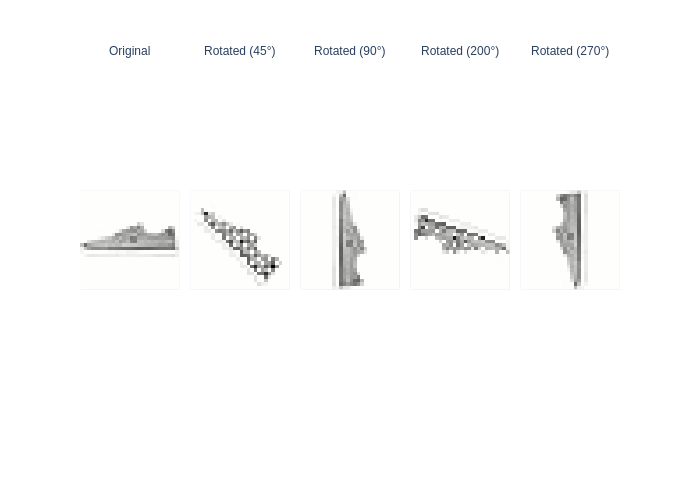

In [ ]:
def create_rotation_matrix(theta, height=28, width=28):
    """
    Create a transformation matrix for rotating an image by theta degrees.

    Args:
        theta (float): Angle of rotation in degrees.
        height (int): Height of the image.
        width (int): Width of the image.

    Returns:
        np.ndarray: A (height*width, height*width) transformation matrix for rotating.
    """
    # Convert theta from degrees to radians
    theta = np.deg2rad(theta)
    N = height * width
    T = np.zeros((N, N))
    center_i = (height - 1) / 2.0
    center_j = (width - 1) / 2.0

    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    for i in range(height):
        for j in range(width):
            input_idx = i * width + j

            x = j - center_j
            y = i - center_i

            new_x = x * cos_theta - y * sin_theta
            new_y = x * sin_theta + y * cos_theta

            new_j = new_x + center_j
            new_i = new_y + center_i

            if 0 <= new_i < height and 0 <= new_j < width:
                new_i_int = int(round(new_i))
                new_j_int = int(round(new_j))

                if 0 <= new_i_int < height and 0 <= new_j_int < width:
                    output_idx = new_i_int * width + new_j_int
                    T[output_idx, input_idx] = 1.0

    return T


def rotate_image(image, theta):
    """
    Apply a rotation transformation to a flattened image array or a batch of flattened images.

    Args:
        image (np.ndarray): Flattened image array of shape (height*width,) or batch of images (N, height*width).
        theta (float): Angle of rotation in degrees.

    Returns:
        np.ndarray: Rotated image(s) as a flattened array or batch of arrays.
    """
    T = create_rotation_matrix(theta)
    return apply_transformation(image, T)

# rotate with matrix
rotated_45 = rotate_image(test_image, 45)
rotated_90 = rotate_image(test_image, 90)
rotated_200 = rotate_image(test_image, 200)
rotated_270 = rotate_image(test_image, 270)

# visualize original and 4 augmentations in plotly image grid
all_images = np.stack([test_image, rotated_45, rotated_90, rotated_200, rotated_270])
plot_labels = ['Original', 'Rotated (45°)', 'Rotated (90°)', 'Rotated (200°)', 'Rotated (270°)']
show_images(all_images, labels=plot_labels, reshape=True)

In [ ]:
grader.check("q4d")

q4d results: All test cases passed!

**Notice something?** For some rotations, we are left with holes in the image.

### Understanding Gaps in Rotated Images

When rotating an image, you may notice white spaces (gaps) in the output. These gaps occur due to the way nearest-neighbor interpolation works. Let’s explore this using a simple $3 \times 3$ image.

---

**Original Image Grid**

The pixel coordinates are:

$$
\begin{bmatrix}
(0,0) & (0,1) & (0,2) \\
(1,0) & (1,1) & (1,2) \\
(2,0) & (2,1) & (2,2)
\end{bmatrix}
$$

The center of the image is at $(1,1)$.

---

**Rotation by $45^\circ$**

1. **Translate the center to the origin**  
   For pixel $(0,0)$:

   $$
   \begin{bmatrix} x \\ y \end{bmatrix}
   =
   \begin{bmatrix} 0 \\ 0 \end{bmatrix}
   -
   \begin{bmatrix} 1 \\ 1 \end{bmatrix}
   =
   \begin{bmatrix} -1 \\ -1 \end{bmatrix}
   $$

2. **Apply the rotation matrix**  
   The rotation matrix for $45^\circ$ is:

   $$
   R(45^\circ) =
   \tfrac{1}{\sqrt{2}}
   \begin{bmatrix}
   1 & -1 \\
   1 & 1
   \end{bmatrix}
   $$

   Applying the rotation:

   $$
   \begin{bmatrix} x' \\ y' \end{bmatrix}
   =
   R(45^\circ)
   \begin{bmatrix} -1 \\ -1 \end{bmatrix}
   =
   \tfrac{1}{\sqrt{2}}
   \begin{bmatrix} (-1) - (-1) \\ (-1) + (-1) \end{bmatrix}
   =
   \begin{bmatrix} 0 \\ -\sqrt{2} \end{bmatrix}
   \approx
   \begin{bmatrix} 0 \\ -1.4142 \end{bmatrix}
   $$

3. **Translate back to the original center**

   $$
   \begin{bmatrix} \text{new}_x \\ \text{new}_y \end{bmatrix}
   =
   \begin{bmatrix} 0 \\ -1.4142 \end{bmatrix}
   +
   \begin{bmatrix} 1 \\ 1 \end{bmatrix}
   \approx
   \begin{bmatrix} 1 \\ -0.4142 \end{bmatrix}
   $$

---

**Nearest-Neighbor Assignment**

To map the rotated pixel back to the grid, we round to the nearest integers:

$$
\text{new row} = \operatorname{round}(-0.4142) = 0,
\quad
\text{new column} = \operatorname{round}(1) = 1
$$

Thus, pixel $(0,0)$ maps to $(0,1)$ in the rotated image.

---

**Why Do Gaps Appear?**

When mapping all pixels:

- **Overlaps**: Multiple original pixels may round to the same target coordinates.  
- **Gaps**: Some target coordinates are never assigned, leaving empty pixels (white spaces).

The rounding step in nearest-neighbor interpolation is the primary cause of these overlaps and gaps in the rotated image.

### Problem 4e: Bilinear Interpolation for Image Rotation

**Task**: When rotating an image, gaps (white spaces) can appear due to nearest-neighbor assignment. To avoid these gaps, set each output pixel to a weighted average of the 4 nearest source pixels. This approach is called [bilinear interpolation](https://en.wikipedia.org/wiki/Bilinear_interpolation) and is common in image processing for producing smoother, gap-free results.

Steps:
1) For each output pixel:
   - Translate its coordinates so that the rotation center is at the origin.
   - Apply the inverse rotation (i.e., rotate backward by the desired angle).
   - Translate the coordinates back to the original image space to locate the corresponding source position.
2) If this source position falls outside the image, set the output pixel to 0.
3) If the source position is inside the image:
       - Find the four nearest source pixels surrounding this position (top-left, top-right, bottom-left, bottom-right).
       - Compute the fractional distances from the source position to these neighbors (horizontal and vertical offsets).
       - Compute a weighted average of the four neighbor values using these offsets (bilinear interpolation).
4) Assign the computed value to the output pixel. If any neighbor used in the interpolation falls outside the image, treat its value as `0`.
5) Repeat for all pixels.


This method uses *inverse mapping* (sampling from the original image) rather than forward mapping (mapping source pixels to output), which helps prevent gaps.


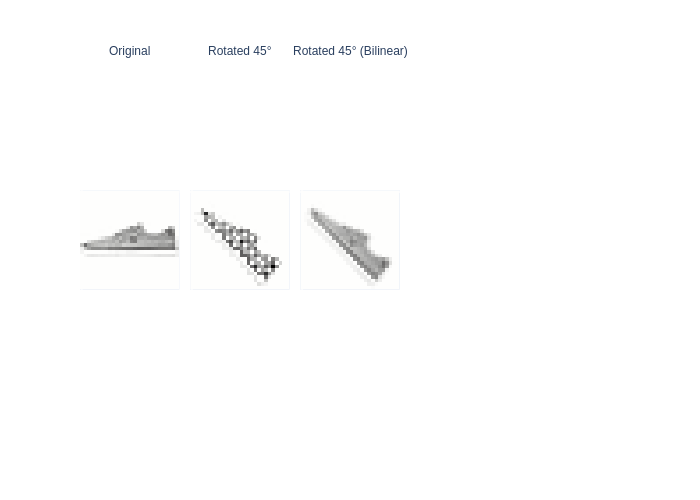

In [ ]:
def create_bilinear_rotation_matrix(theta, height=28, width=28):
    """
    Create a (height*width, height*width) matrix that applies bilinear interpolation
    for rotating a flattened image by theta degrees.
    Each row of the matrix gives the weights for the input pixels that contribute to each output pixel.

    Args:
        theta (float): Angle of rotation in degrees.
        height (int): Height of the image.
        width (int): Width of the image.

    Returns:
        np.ndarray: A (height*width, height*width) transformation matrix for rotating.
    """
    theta = np.deg2rad(theta)
    N = height * width
    T = np.zeros((N, N))
    center_i = (height - 1) / 2.0
    center_j = (width - 1) / 2.0
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    for i in range(height):
        for j in range(width):
            output_idx = i * width + j


            x = j - center_j
            y = i - center_i


            source_x = x * cos_theta + y * sin_theta
            source_y = -x * sin_theta + y * cos_theta


            source_j = source_x + center_j
            source_i = source_y + center_i


            i1 = int(np.floor(source_i))
            j1 = int(np.floor(source_j))
            i2 = i1 + 1
            j2 = j1 + 1

            di = source_i - i1
            dj = source_j - j1

            w11 = (1 - di) * (1 - dj)
            w12 = (1 - di) * dj
            w21 = di * (1 - dj)
            w22 = di * dj

            if 0 <= i1 < height and 0 <= j1 < width:
                input_idx = i1 * width + j1
                T[output_idx, input_idx] += w11

            if 0 <= i1 < height and 0 <= j2 < width:
                input_idx = i1 * width + j2
                T[output_idx, input_idx] += w12

            if 0 <= i2 < height and 0 <= j1 < width:
                input_idx = i2 * width + j1
                T[output_idx, input_idx] += w21

            if 0 <= i2 < height and 0 <= j2 < width:
                input_idx = i2 * width + j2
                T[output_idx, input_idx] += w22
    return T


def rotate_image_bilinear(image, theta):
    """
    Rotate an image using bilinear interpolation.

    Args:
        image (np.ndarray): Flattened image array of shape (height*width,) or batch of images (N, height*width).
        theta (float): Angle of rotation in degrees.

    Returns:
        np.ndarray: Rotated image as a flattened array.
    """
    T = create_bilinear_rotation_matrix(theta)
    return apply_transformation(image, T)

# rotate with matrix
rotated = rotate_image(test_image, 45)
rotated_interpolated = rotate_image_bilinear(test_image, 45)

all_images = np.stack([test_image, rotated, rotated_interpolated])
plot_labels = ['Original',  'Rotated 45°', 'Rotated 45° (Bilinear)']
show_images(all_images, labels=plot_labels, reshape=True)

In [ ]:
grader.check("q4e")

q4e results: All test cases passed!

### Problem 4f: Composing Transformations

An advantage of transformation matrices is their composability: you can combine multiple transformations into a single matrix. This allows you to apply multiple transformations to an image with the same computational cost as applying just one.

**Task**:

1. **Compose Multiple Transformations**:
    Implement `compose_transforms(*Ts)`, which takes any number of 784x784 transformation matrices (e.g., shift, rotate, blur) and returns a single matrix that represents applying all transformations in sequence. The transformations should be applied in the order they are provided: the first matrix is applied first, followed by the second, and so on.

2. **Rotate and Blur**:
    Implement `rotate_then_blur(image, theta, kernel_size)`, which rotates an image by `theta` degrees (without bilinear interpolation) and then applies a blur with a kernel of size `kernel_size`. Use `compose_transforms` to combine the transformations and apply them to the image.

3. **Shift, Rotate, and Blur**:
    Implement `shift_then_rotate_then_blur(image, dx, dy, theta, kernel_size)`, which shifts an image by `(dx, dy)`, rotates it by `theta` degrees (without bilinear interpolation), and then applies a blur with a kernel of size `kernel_size`. Again, use `compose_transforms` to combine the transformations and apply them to the image.

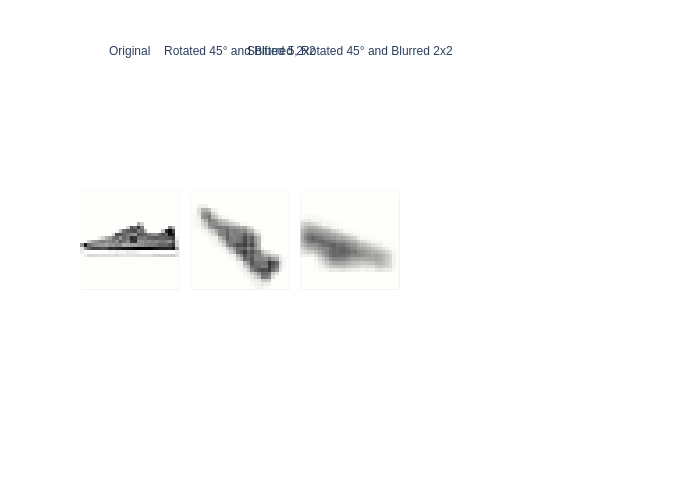

In [ ]:
def compose_transforms(*Ts):
  """
  Compose linear image transforms (each 784x784).
  Inputs:
    Ts: list of transformation matrices
  Returns:
    T_total: composition of all input transformations
  """
  if not Ts:
      return np.eye(784)

  T_total = Ts[0]

  for T in Ts[1:]:
      T_total = T @ T_total
  return T_total

def rotate_then_blur(image, theta, kernel_size):
  """
  Rotate an image by theta degrees (without bilinear interpolation) and then blur it with a kernel of size kernel_size.
  """
  T_rotate = create_rotation_matrix(theta)
  T_blur = create_blur_matrix(kernel_size)

  T_total = compose_transforms(T_rotate, T_blur)

  return apply_transformation(image, T_total)

def shift_then_rotate_then_blur(image, dx, dy, theta, kernel_size):
  """
  Shift an image by (dx, dy), then rotate it by theta degrees (without bilinear interpolation), and then blur it with a kernel of size kernel_size.
  """

  T_shift = create_shift_matrix(dx, dy)
  T_rotate = create_rotation_matrix(theta)
  T_blur = create_blur_matrix(kernel_size)

  T_total = compose_transforms(T_shift, T_rotate, T_blur)

  return apply_transformation(image, T_total)

rotated_blurred_image = rotate_then_blur(test_image, 45, 3)
shifted_rotated_blurred_image = shift_then_rotate_then_blur(test_image, 1, -4, 200, 5)

all_images = np.stack([test_image, rotated_blurred_image, shifted_rotated_blurred_image])
plot_labels = ['Original', 'Rotated 45° and Blurred 2x2', 'Shifted 5, Rotated 45° and Blurred 2x2']
show_images(all_images, labels=plot_labels, reshape=True)

In [ ]:
grader.check("q4f")

q4f results:
    q4f - 1 result:
        ❌ Test case failed
        Trying:
            assert compose_transforms(create_rotation_matrix(45), create_blur_matrix(2)).shape == (784, 784), 'Compose transforms should return a 784x784 matrix'
        Expecting nothing
        ok
        Trying:
            gt_rotate_then_blur_transform = np.load('public_solutions/rotate_then_blur_transform.npy')
        Expecting nothing
        ok
        Trying:
            gt_shift_then_rotate_then_blur_transform = np.load('public_solutions/shift_then_rotate_then_blur_transform.npy')
        Expecting nothing
        ok
        Trying:
            gt_rotate_then_blur_transform_updated = np.load('public_solutions/rotate_then_blur_transform_updated.npy')
        Expecting nothing
        ok
        Trying:
            gt_shift_then_rotate_then_blur_transform_updated = np.load('public_solutions/shift_then_rotate_then_blur_transform_updated.npy')
        Expecting nothing
        ok
        Trying:
            assert np.array_equal(rotate_then_blur(test_image, 45, 2), gt_rotate_then_blur_transform) or np.array_equal(rotate_then_blur(test_image, 45, 3), gt_rotate_then_blur_transform_updated), 'Rotate then blur image does not match solution'
        Expecting nothing
        **********************************************************************
        Line 6, in q4f 0
        Failed example:
            assert np.array_equal(rotate_then_blur(test_image, 45, 2), gt_rotate_then_blur_transform) or np.array_equal(rotate_then_blur(test_image, 45, 3), gt_rotate_then_blur_transform_updated), 'Rotate then blur image does not match solution'
        Exception raised:
            Traceback (most recent call last):
              File "/usr/lib/python3.12/doctest.py", line 1368, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4f 0[5]>", line 1, in <module>
                assert np.array_equal(rotate_then_blur(test_image, 45, 2), gt_rotate_then_blur_transform) or np.array_equal(rotate_then_blur(test_image, 45, 3), gt_rotate_then_blur_transform_updated), 'Rotate then blur image does not match solution'
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError: Rotate then blur image does not match solution
        Trying:
            assert np.allclose(shift_then_rotate_then_blur(test_image, 1, -4, 200, 3), gt_shift_then_rotate_then_blur_transform, rtol=1e-05, atol=1e-08) or np.allclose(shift_then_rotate_then_blur(test_image, 1, -4, 200, 5), gt_shift_then_rotate_then_blur_transform_updated, rtol=1e-05, atol=1e-08), 'Shift then rotate then blur image does not match solution'
        Expecting nothing
        **********************************************************************
        Line 7, in q4f 0
        Failed example:
            assert np.allclose(shift_then_rotate_then_blur(test_image, 1, -4, 200, 3), gt_shift_then_rotate_then_blur_transform, rtol=1e-05, atol=1e-08) or np.allclose(shift_then_rotate_then_blur(test_image, 1, -4, 200, 5), gt_shift_then_rotate_then_blur_transform_updated, rtol=1e-05, atol=1e-08), 'Shift then rotate then blur image does not match solution'
        Exception raised:
            Traceback (most recent call last):
              File "/usr/lib/python3.12/doctest.py", line 1368, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4f 0[6]>", line 1, in <module>
                assert np.allclose(shift_then_rotate_then_blur(test_image, 1, -4, 200, 3), gt_shift_then_rotate_then_blur_transform, rtol=1e-05, atol=1e-08) or np.allclose(shift_then_rotate_then_blur(test_image, 1, -4, 200, 5), gt_shift_then_rotate_then_blur_transform_updated, rtol=1e-05, atol=1e-08), 'Shift then rotate then blur image does not match solution'
                       ^^^^^^^^^^^^^^^^^^^^

### Problem 4g: Matrix Multiply Questions

1. Does the order in which you apply transformations matter? Why or why not?  
2. When can a transformation be undone (i.e., when can you multiply your augmented image by another transformation matrix to recover the original image)? What matrix would you multiply by to recover the original image?  
3. Which of the augmentations implemented above can be "undone"? For augmentations that can be undone but may lose information (e.g., parts of the image are cut off), explain the conditions under which this occurs.  
4. Which of these augmentations *cannot* be "undone" with another matrix multiplication? Why not?  

### Testing Augmentation on Classifier Performance

In this section, we will evaluate how our trained classifier performs on augmented versions of the test images. This will help us understand the robustness of the model to various transformations.

The goal is to analyze the impact of different augmentation techniques on the classifier's performance. Specifically, we will:

1. **Create Augmented Test Images**:
    - Use the image augmentation functions (e.g., rotation, flipping, shifting, blurring) to generate transformed versions of the test images.

2. **Evaluate the Classifier**:
    - Test the classifier on the augmented images.
    - Measure and compare the accuracy for each augmentation type.

3. **Visualize Results**:
    - Plot the performance metrics to identify which augmentations the classifier handles well and which ones degrade performance.

### Problem 4h: Augmenting Test Images

**Task**: Create augmented versions of the test images using the image augmentation functions we implemented earlier.

**Steps**:
1. Apply each augmentation technique (e.g., horizontal flip, vertical flip, rotation, shifting, blurring) to a sample of 100 test images. This should result in 1300 images (13 augmentations $\times$ 100 test images)
2. Store the augmented images in a structured format for evaluation.
3. Ensure that the augmented images are labeled correctly for comparison with the classifier's predictions.

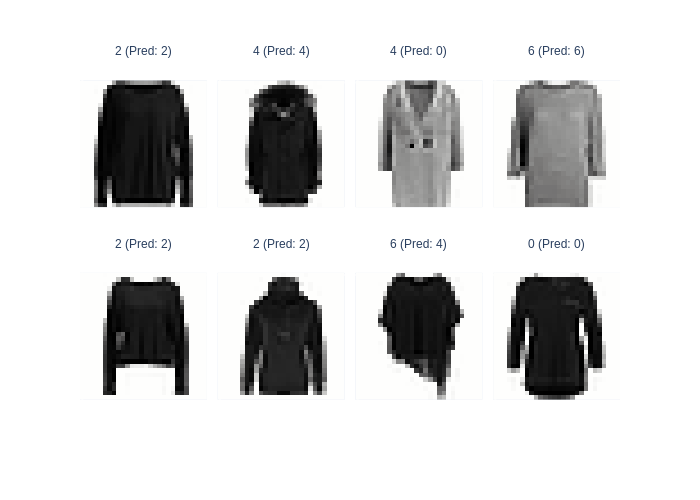

In [ ]:
# Test augmentation functions on a few examples
test_images = np.stack(test_df['image'])
test_labels = test_df['label']

shift_inputs = [(5, 0), (-5, 0), (0, 5), (0, -5)]
rotate_inputs = [45, 90, 200]
blur_inputs = [3, 5]
rotate_blur_inputs = [(45, 3), (90, 5)]
shift_rotate_blur_inputs = [((5, 0), 45, 3), ((-5, 0), 90, 5)]

augmented_data = []
# Randomly sample 100 datapoints from test_images
sample_idx = np.random.choice(len(test_images), 100, replace=False)
test_images_sample = test_images[sample_idx]
test_labels_sample = np.array(test_labels)[sample_idx]

# TODO: Apply the augmentation functions we just created (shift, blur, rotate w/ bilinear, rotate then blur, shift then rotate then blur) to every image from test_images_sample
# use the inputs defined above to apply the augmentations
# Save the augmented images in a new DataFrame aug_df

for i, image in enumerate(test_images_sample):
    label = test_labels_sample[i]
    original_idx = sample_idx[i]

    augmented_data.append({
        'original_idx': original_idx,
        'image': image,
        'label': label,
        'augmentation': 'original'
    })

    for dx, dy in shift_inputs:
        shifted_image = shift_image(image, dx, dy)
        augmented_data.append({
            'original_idx': original_idx,
            'image': shifted_image,
            'label': label,
            'augmentation': f'shift_{dx}_{dy}'
        })

    for theta in rotate_inputs:
        rotated_image = rotate_image_bilinear(image, theta)
        augmented_data.append({
            'original_idx': original_idx,
            'image': rotated_image,
            'label': label,
            'augmentation': f'rotate_{theta}'
        })

    for kernel_size in blur_inputs:
        blurred_image = blur_image(image, kernel_size)
        augmented_data.append({
            'original_idx': original_idx,
            'image': blurred_image,
            'label': label,
            'augmentation': f'blur_{kernel_size}'
        })

    for theta, kernel_size in rotate_blur_inputs:
        rotated_blurred_image = rotate_then_blur(image, theta, kernel_size)
        augmented_data.append({
            'original_idx': original_idx,
            'image': rotated_blurred_image,
            'label': label,
            'augmentation': f'rotate_{theta}_blur_{kernel_size}'
        })

    for (dx, dy), theta, kernel_size in shift_rotate_blur_inputs:
        shifted_rotated_blurred_image = shift_then_rotate_then_blur(image, dx, dy, theta, kernel_size)
        augmented_data.append({
            'original_idx': original_idx,
            'image': shifted_rotated_blurred_image,
            'label': label,
            'augmentation': f'shift_{dx}_{dy}_rotate_{theta}_blur_{kernel_size}'
        })

aug_df = pd.DataFrame(augmented_data)

# TODO: Select an image and visualize it with all the augmentations applied to it
sample_image_idx = 0
sample_image = test_images_sample[sample_image_idx]

image_augmentations = aug_df[aug_df['image'].apply(lambda x: np.array_equal(x, sample_image))]

augmented_images = []
augmentation_labels = []

for _, row in image_augmentations.iterrows():
    augmented_images.append(row['image'])
    augmentation_labels.append(row['augmentation'])
fig.show()

In [ ]:
grader.check("q4h")

q4h results: All test cases passed!

### Problem 4i: Evaluating Classifier Performance on Augmented Data

**Task:** Evaluate the classifier's performance on the augmented test data and compare its accuracy across different types of augmentations. Create a `DataFrame` named `aug_performance` with the following columns:
  - `augmentation`: A string describing the applied augmentation (e.g., "shift_5_0", "rotate_90", "blur_2x2").
  - `accuracy`: The classifier's accuracy on the augmented data.
  - `type`: The augmentation type (e.g., blur, rotate, shift, rotate_blur, shift_rotate_blur, none).

**Hints:**
1. Check the `image` column's data type and shape. The model likely expects a 3D array. Use `np.stack` to combine all augmented images in your `DataFrame` before scaling and passing them to the model.
2. Use scikit-learn's `StandardScaler` to scale the data before evaluation.

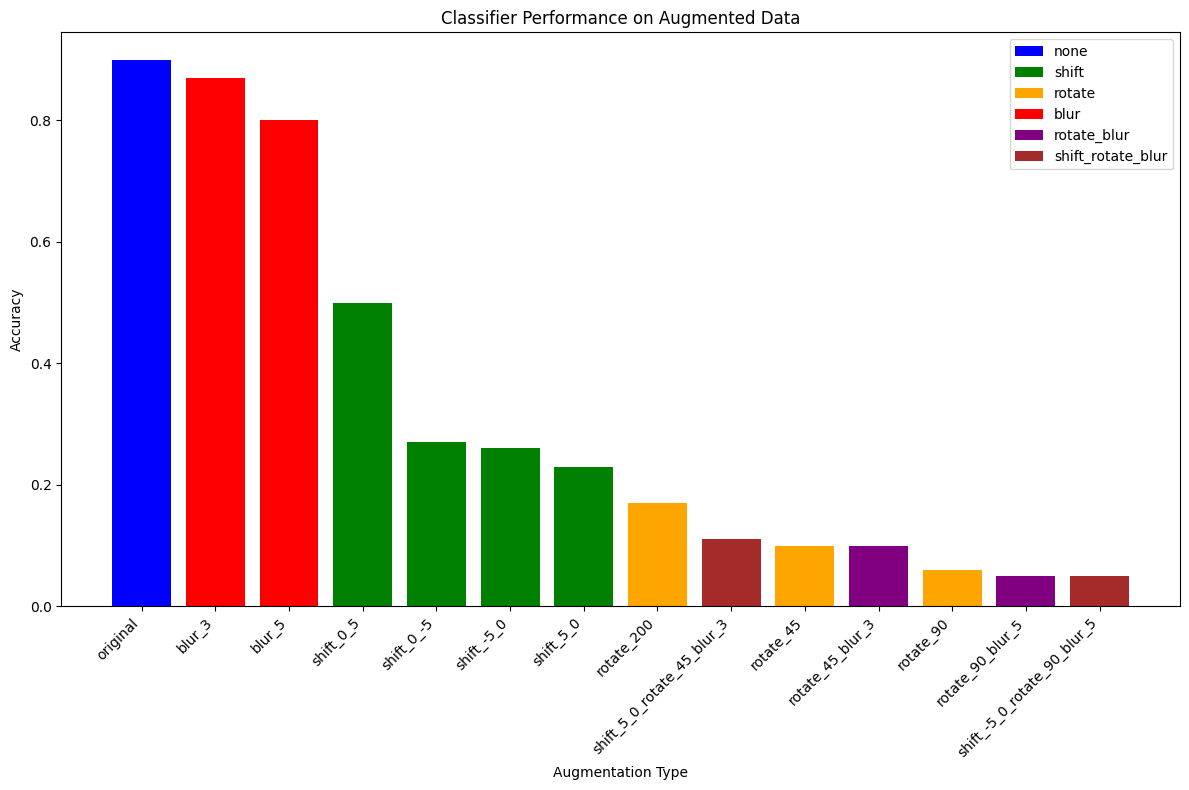

In [ ]:
# Evaluate classifier performance on augmented data
from sklearn.preprocessing import StandardScaler

aug_images = np.stack(aug_df['image'])
aug_labels = aug_df['label']

scaler = StandardScaler()
aug_images_scaled = scaler.fit_transform(aug_images.reshape(len(aug_images), -1))

aug_predictions = model.predict(aug_images_scaled)

aug_performance = []

aug_types = aug_df['augmentation'].unique()

for aug_type in aug_types:
    aug_mask = aug_df['augmentation'] == aug_type
    aug_true_labels = aug_df[aug_mask]['label'].values
    aug_pred_labels = aug_predictions[aug_mask]

    accuracy = np.mean(aug_true_labels == aug_pred_labels)

    if 'shift' in aug_type and 'rotate' in aug_type and 'blur' in aug_type:
        type_category = 'shift_rotate_blur'
    elif 'rotate' in aug_type and 'blur' in aug_type:
        type_category = 'rotate_blur'
    elif 'shift' in aug_type:
        type_category = 'shift'
    elif 'rotate' in aug_type:
        type_category = 'rotate'
    elif 'blur' in aug_type:
        type_category = 'blur'
    else:
        type_category = 'none'

    aug_performance.append({
        'augmentation': aug_type,
        'accuracy': accuracy,
        'type': type_category
    })

aug_performance = pd.DataFrame(aug_performance)

aug_performance_sorted = aug_performance.sort_values('accuracy', ascending=False)

# Visualize performance: sort by accuracy, color by augmentation type (blur, rotate, shift, none)
import matplotlib.pyplot as plt

color_map = {
    'none': 'blue',
    'shift': 'green',
    'rotate': 'orange',
    'blur': 'red',
    'rotate_blur': 'purple',
    'shift_rotate_blur': 'brown'
}

colors = [color_map[aug_type] for aug_type in aug_performance_sorted['type']]

plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(aug_performance_sorted)), aug_performance_sorted['accuracy'], color=colors)
plt.xlabel('Augmentation Type')
plt.ylabel('Accuracy')
plt.title('Classifier Performance on Augmented Data')
plt.xticks(range(len(aug_performance_sorted)), aug_performance_sorted['augmentation'], rotation=45, ha='right')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=aug_type) for aug_type, color in color_map.items()]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
fig = plt.gcf()
fig.show()
fig.show()

In [ ]:
grader.check("q4i")

q4i results: All test cases passed!

### Problem 4j: Analysis of Augmentation Techniques

Among the augmentation techniques, which performed the best and which performed the worst? Why do you think this is the case? Provide reasoning based on the nature of the augmentations and their impact on the model's ability to generalize.

> In the histogram, we can see that aside from the original data, the blur_3x3 augmentation achieves the best performance, while the combination of shifting (-5, 0), 90-degree rotation, and a 5x5 blur results in the worst performance. Data augmentation is intended to introduce variety to the training set to prevent overfitting and help the model generalize beyond specific situations. However, I believe that excessive transformation of the original data can lead to samples that are no longer representative of the true label. This makes it difficult for the model to learn the important features. In contrast, slight augmentations like blur_3x3 help the model generalize better while still preserving the key characteristics of the image. On the other hand, combining large shifts, strong blurring, and rotation distorts the image so much that the model can no longer capture the original class defining features, which likely explains the poor performance. blurring, and rotation distorts the image so much that the model can no longer capture the original class defining features.

<!-- END QUESTION -->

You will being doing a LOT of matrix multiplication this semester, so get comfortable with these operations—they are fundamental to many machine learning algorithms you'll encounter!

# Before you submit, ensure save_models is true

In [ ]:
assert save_models and load_saved_models, "save_models and load_saved_models must be True"

assert os.path.exists('classifier.joblib'), "classifier.joblib should exist"

Now that we have gotten familiar with pandas, numpy, and the classic training loop let's look into how we can debug and improve classifiers!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
## Use this cell if you are running the notebook in Google Colab to install the necessary dependencies, this may take a few minutes
if IS_COLAB:
    !apt-get install -y texlive texlive-xetex pandoc


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java
  libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data preview-latex-style
  rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True, files=['classifier.joblib'])

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q0 results: All test cases passed!

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q1d results: All test cases passed!

    q2a results: All test cases passed!

    q3a results: All test cases passed!

    q3b results: All test cases passed!

    q3c results: All test cases passed!

    q3e results: All test cases passed!

    q3f results: All test cases passed!

    q3g results: All test cases passed!

    q3i results: All test cases passed!

    q4a results: All test cases passed!

    q4b results: All test cases passed!

    q4c results: All test cases passed!

    q4d results: All test cases passed!

    q4e results: All test cases passed!

    q4f results:
        q4f - 1 result:
            ❌ Test case failed
            Trying:
                assert compose_transforms(create_rotation_matrix(45), c